In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import wrangle as wr
import explore as ex
import model as mod

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline
pd.options.display.max_columns = None

np.set_printoptions(suppress=True)

seed = 42

# acquire and prep

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df = df.rename(columns={'HeartDisease': 'heart_disease',
                       'BMI': 'bmi', 
                       'Smoking': 'smoker',
                       'AlcoholDrinking': 'heavy_drinker',
                       'Stroke': 'stroke',
                       'PhysicalHealth': 'physical_health',
                       'MentalHealth': 'mental_health',
                       'DiffWalking': 'difficulty_walking',
                       'Sex': 'sex',
                       'AgeCategory': 'age_group',
                       'Race': 'race',
                       'Diabetic': 'diabetic',
                       'PhysicalActivity': 'physically_active',
                       'GenHealth': 'general_health',
                       'SleepTime': 'sleep_time',
                       'Asthma': 'asthma',
                       'KidneyDisease': 'kidney_disease',
                       'SkinCancer': 'skin_cancer'
                       })

In [5]:
def get_heart_disease():
    
    df = pd.read_csv('heart_2020_cleaned.csv')
    
    df = df.rename(columns={'HeartDisease': 'heart_disease',
                       'BMI': 'bmi', 
                       'Smoking': 'smoker',
                       'AlcoholDrinking': 'heavy_drinker',
                       'Stroke': 'stroke',
                       'PhysicalHealth': 'physical_health',
                       'MentalHealth': 'mental_health',
                       'DiffWalking': 'difficulty_walking',
                       'Sex': 'sex',
                       'AgeCategory': 'age_group',
                       'Race': 'race',
                       'Diabetic': 'diabetic',
                       'PhysicalActivity': 'physically_active',
                       'GenHealth': 'general_health',
                       'SleepTime': 'sleep_time',
                       'Asthma': 'asthma',
                       'KidneyDisease': 'kidney_disease',
                       'SkinCancer': 'skin_cancer'
                       })
    
    return df

In [6]:
df.dtypes

heart_disease          object
bmi                   float64
smoker                 object
heavy_drinker          object
stroke                 object
physical_health       float64
mental_health         float64
difficulty_walking     object
sex                    object
age_group              object
race                   object
diabetic               object
physically_active      object
general_health         object
sleep_time            float64
asthma                 object
kidney_disease         object
skin_cancer            object
dtype: object

In [7]:
df.isna().sum()

heart_disease         0
bmi                   0
smoker                0
heavy_drinker         0
stroke                0
physical_health       0
mental_health         0
difficulty_walking    0
sex                   0
age_group             0
race                  0
diabetic              0
physically_active     0
general_health        0
sleep_time            0
asthma                0
kidney_disease        0
skin_cancer           0
dtype: int64

In [8]:
df['age_group'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

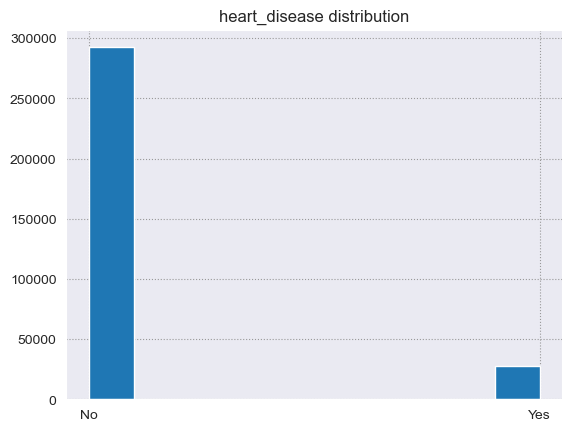

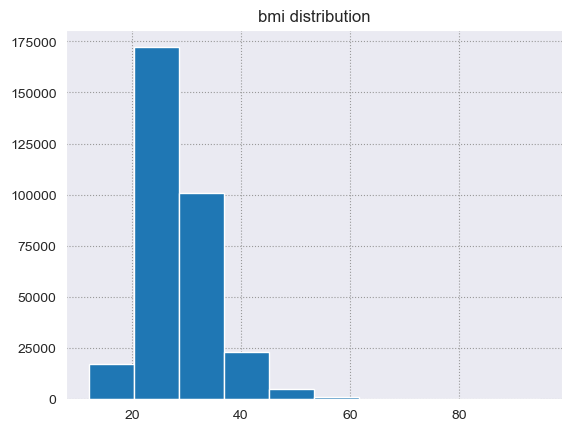

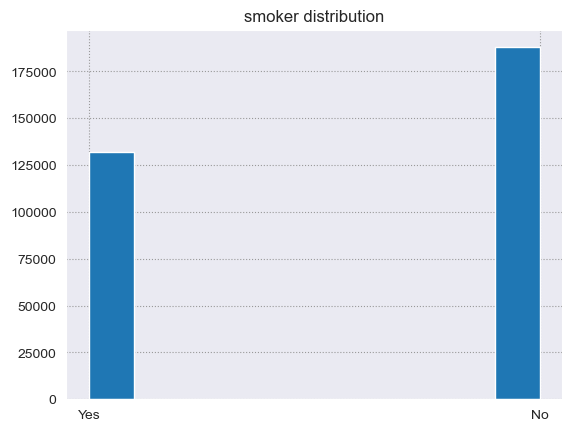

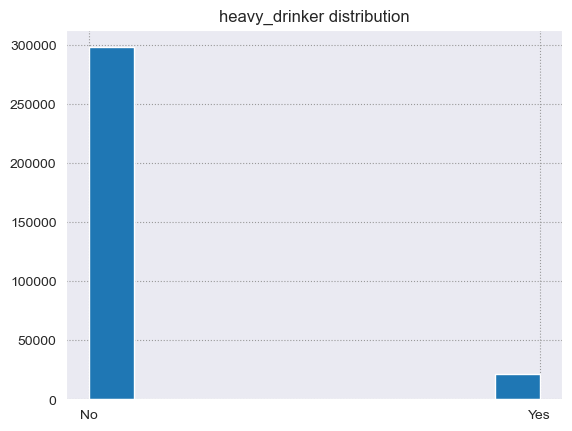

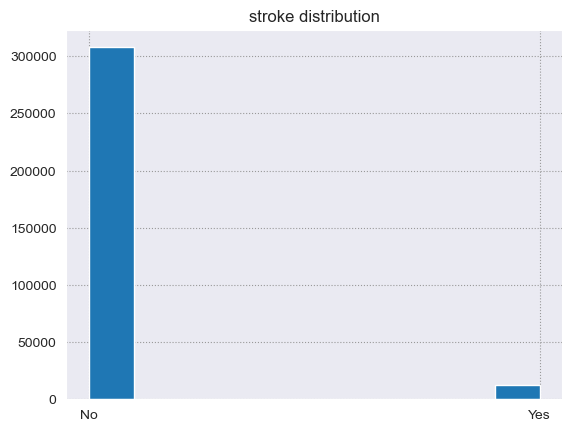

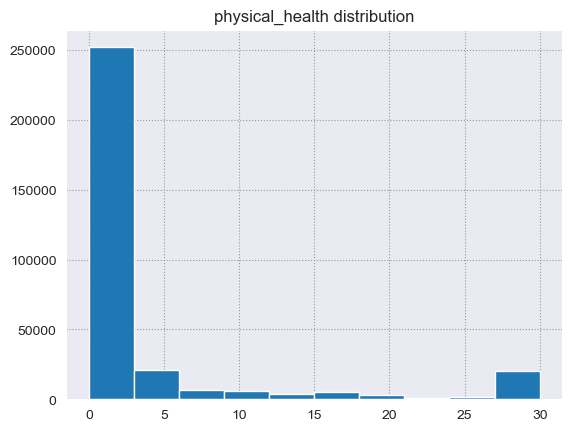

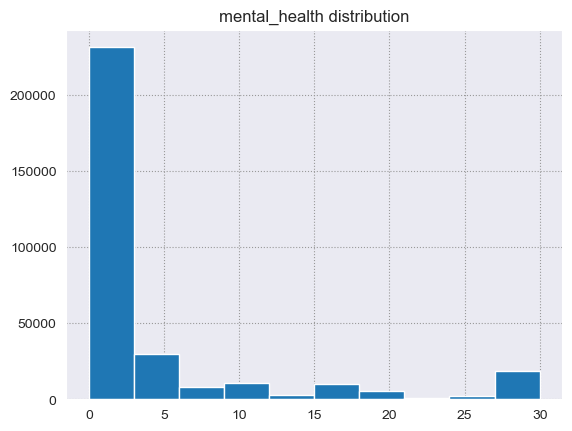

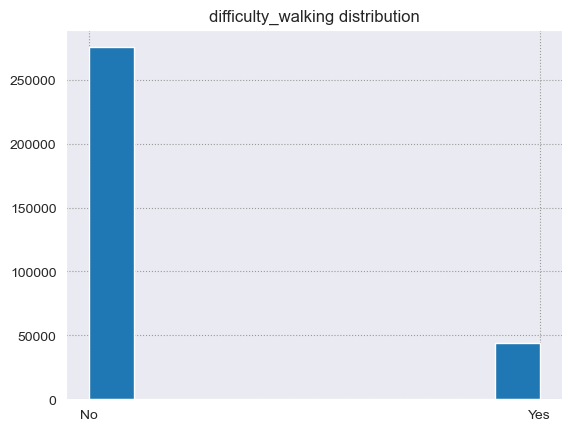

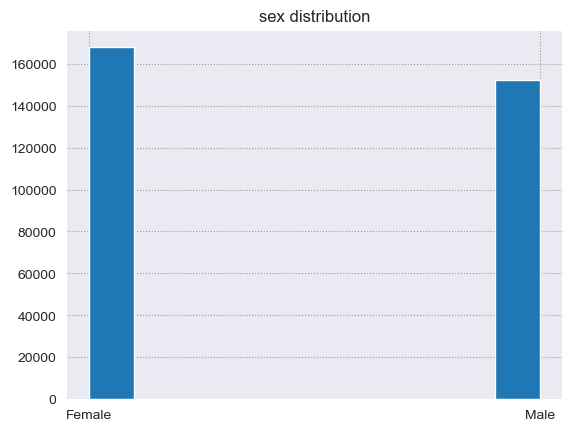

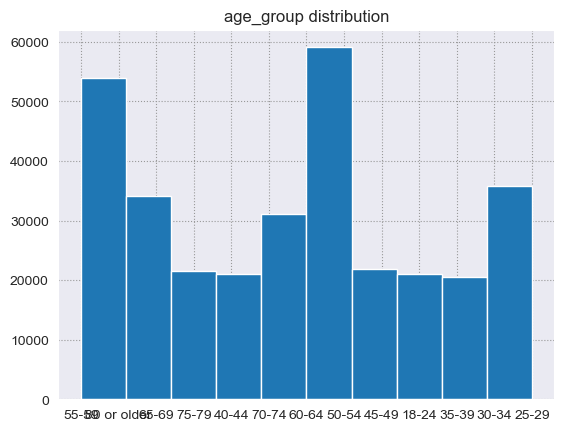

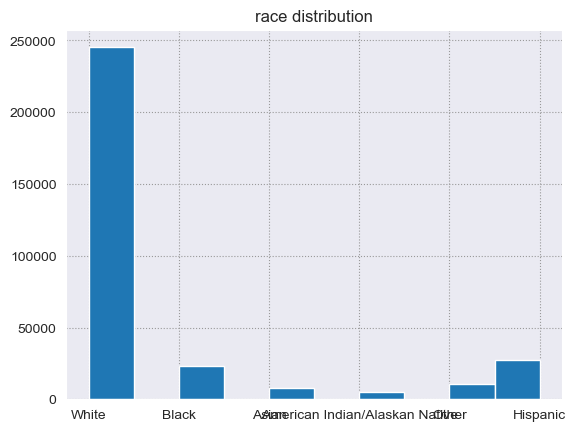

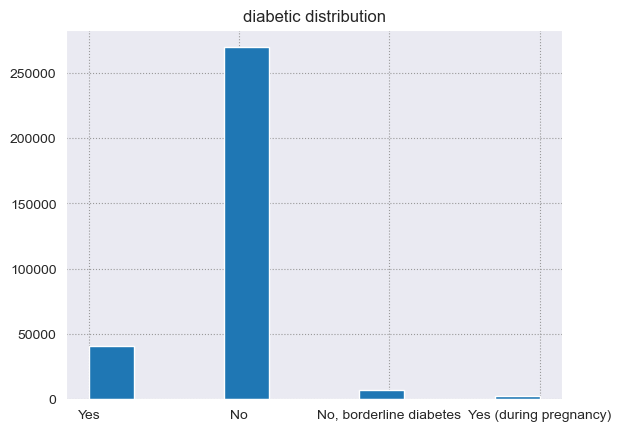

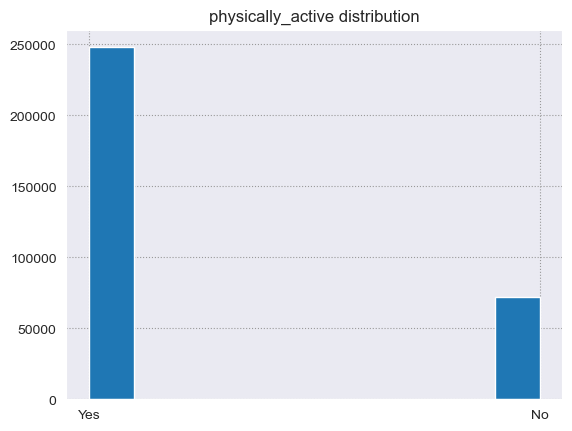

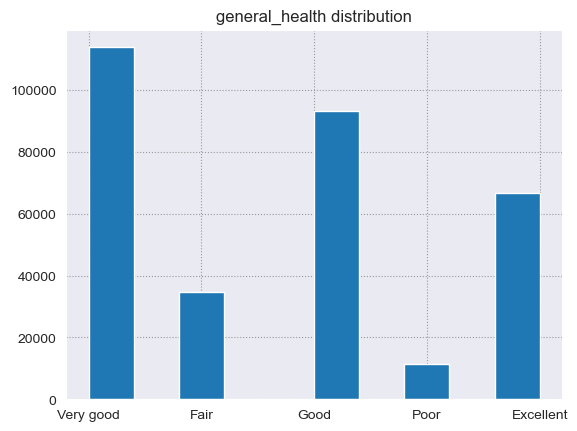

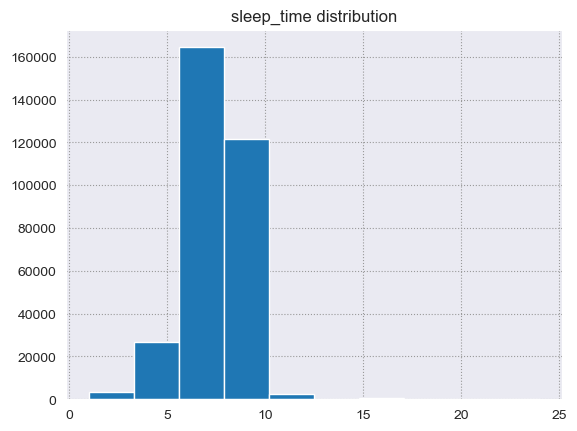

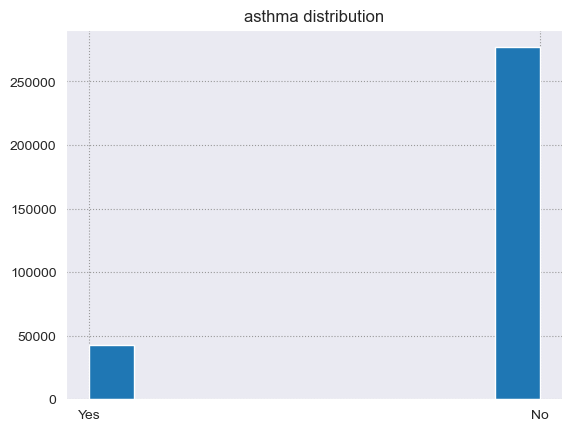

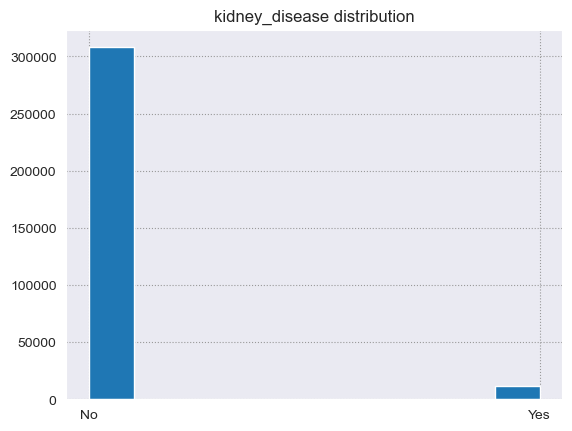

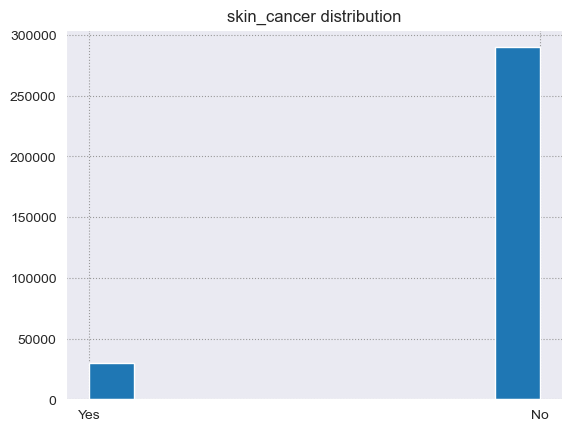

In [9]:
for col in df.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [10]:
df.columns

Index(['heart_disease', 'bmi', 'smoker', 'heavy_drinker', 'stroke',
       'physical_health', 'mental_health', 'difficulty_walking', 'sex',
       'age_group', 'race', 'diabetic', 'physically_active', 'general_health',
       'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer'],
      dtype='object')

In [11]:
df = get_heart_disease()

In [12]:
cont_cols = ['bmi', 'physical_health', 'mental_health', 'sleep_time']

cat_cols = ['smoker', 'heavy_drinker', 'stroke', 'difficulty_walking', 'sex', 'age_group', 'race', 
            'diabetic', 'physically_active', 'general_health', 'asthma', 'kidney_disease', 'skin_cancer', 'heart_disease']

In [13]:
df = wr.remove_outliers(df, 3, cont_cols)

# exploration

In [14]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [15]:
df = df.drop(columns=['diabetic_No, borderline diabetes', 'diabetic_Yes (during pregnancy)'])

In [16]:
df.head()

,bmi,physical_health,mental_health,sleep_time,smoker_Yes,heavy_drinker_Yes,stroke_Yes,difficulty_walking_Yes,sex_Male,age_group_25-29,age_group_30-34,age_group_35-39,age_group_40-44,age_group_45-49,age_group_50-54,age_group_55-59,age_group_60-64,age_group_65-69,age_group_70-74,age_group_75-79,age_group_80 or older,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_Yes,physically_active_Yes,general_health_Fair,general_health_Good,general_health_Poor,general_health_Very good,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes,heart_disease_Yes
1,20.34,0.0,0.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,28.87,6.0,0.0,12.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7,31.64,5.0,0.0,9.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0
8,26.45,0.0,0.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [17]:
train, validate, test = wr.subset_df(df, stratify='heart_disease')

(145432, 36) (48477, 36) (48478, 36)


## comparing the features included in my initial hypothesis against the target:

In [18]:
df.dtypes

bmi                         float64
physical_health             float64
mental_health               float64
sleep_time                  float64
smoker_Yes                    uint8
heavy_drinker_Yes             uint8
stroke_Yes                    uint8
difficulty_walking_Yes        uint8
sex_Male                      uint8
age_group_25-29               uint8
age_group_30-34               uint8
age_group_35-39               uint8
age_group_40-44               uint8
age_group_45-49               uint8
age_group_50-54               uint8
age_group_55-59               uint8
age_group_60-64               uint8
age_group_65-69               uint8
age_group_70-74               uint8
age_group_75-79               uint8
age_group_80 or older         uint8
race_Asian                    uint8
race_Black                    uint8
race_Hispanic                 uint8
race_Other                    uint8
race_White                    uint8
diabetic_Yes                  uint8
physically_active_Yes       

### bmi vs heart disease

In [19]:
ex.mannwhitney_report(train['bmi'], train['heart_disease_Yes'])

T-statistic = 21150466624.0000
p-value     = 0.0000
Is p-value < alpha? True


### physical health vs heart disease

In [20]:
ex.mannwhitney_report(train['physical_health'], train['heart_disease_Yes'])

T-statistic = 11695827738.0000
p-value     = 0.0000
Is p-value < alpha? True


### difficulty walking vs heart disease

In [21]:
ex.chi2_report(train, 'difficulty_walking_Yes', 'heart_disease_Yes')

Observed Values

[[125455   7980]
 [  9722   2275]]
---
Expected Values

[[124025   9409]
 [ 11151    845]]
---

chi^2 = 2828.6916
p     = 0.0000
Is p-value < alpha? True


### age vs heart disease

In [22]:
train.head()

,bmi,physical_health,mental_health,sleep_time,smoker_Yes,heavy_drinker_Yes,stroke_Yes,difficulty_walking_Yes,sex_Male,age_group_25-29,age_group_30-34,age_group_35-39,age_group_40-44,age_group_45-49,age_group_50-54,age_group_55-59,age_group_60-64,age_group_65-69,age_group_70-74,age_group_75-79,age_group_80 or older,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_Yes,physically_active_Yes,general_health_Fair,general_health_Good,general_health_Poor,general_health_Very good,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes,heart_disease_Yes
53335,26.63,0.0,0.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
146989,32.08,0.0,0.0,6.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9040,24.68,0.0,0.0,6.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
41537,25.84,0.0,1.0,8.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
214389,25.06,0.0,0.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [25]:
ex.anova_report(train['age_group_25-29'], train['age_group_30-34'], train['age_group_35-39'], train['age_group_40-44'], train['age_group_45-49'])

f-statistic = 130.5456
p-value     = 0.0000
Is p-value < alpha? True


In [27]:
ex.anova_report(train['age_group_50-54'], train['age_group_55-59'], train['age_group_60-64'], train['age_group_65-69'], train['age_group_70-74'])

f-statistic = 276.7383
p-value     = 0.0000
Is p-value < alpha? True


### physically active vs heart disease

In [28]:
ex.chi2_report(train, 'physically_active_Yes', 'heart_disease_Yes')

Observed Values

[[ 24225   2844]
 [110952   7411]]
---
Expected Values

[[ 25160   1908]
 [110016   8346]]
---

chi^2 = 605.1303
p     = 0.0000
Is p-value < alpha? True


## q1 - physical activity vs bmi

In [29]:
df.dtypes

bmi                         float64
physical_health             float64
mental_health               float64
sleep_time                  float64
smoker_Yes                    uint8
heavy_drinker_Yes             uint8
stroke_Yes                    uint8
difficulty_walking_Yes        uint8
sex_Male                      uint8
age_group_25-29               uint8
age_group_30-34               uint8
age_group_35-39               uint8
age_group_40-44               uint8
age_group_45-49               uint8
age_group_50-54               uint8
age_group_55-59               uint8
age_group_60-64               uint8
age_group_65-69               uint8
age_group_70-74               uint8
age_group_75-79               uint8
age_group_80 or older         uint8
race_Asian                    uint8
race_Black                    uint8
race_Hispanic                 uint8
race_Other                    uint8
race_White                    uint8
diabetic_Yes                  uint8
physically_active_Yes       

physically active is a categorical column, while bmi is continuous, so i will run a mann whitney u test

In [30]:
ex.mannwhitney_report(train['bmi'], df['physically_active_Yes'])

T-statistic = 35250826184.0000
p-value     = 0.0000
Is p-value < alpha? True


In [31]:
train['bmi'].mean()

27.888068444356268

<AxesSubplot:xlabel='physically_active_Yes', ylabel='bmi'>

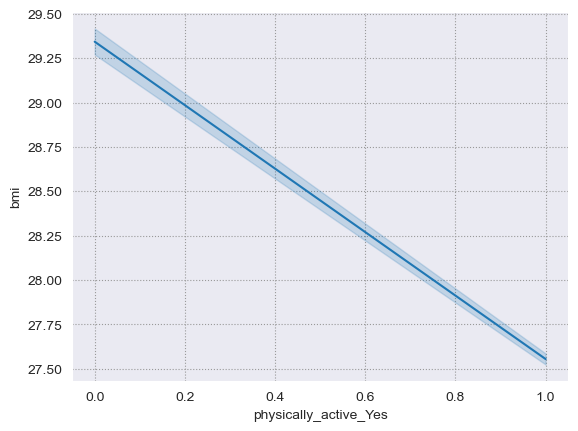

In [32]:
sns.lineplot(data=train, x='physically_active_Yes', y='bmi')

Unsurprisingly, there is a direct relationship between someone being (or not being) physically active and their bmi

## q2 - stroke vs heart disease

In [33]:
ex.chi2_report(train, 'stroke_Yes', 'heart_disease_Yes')

Observed Values

[[132360   8989]
 [  2817   1266]]
---
Expected Values

[[131381   9967]
 [  3795    287]]
---

chi^2 = 3674.3780
p     = 0.0000
Is p-value < alpha? True


<AxesSubplot:xlabel='stroke_Yes', ylabel='heart_disease_Yes'>

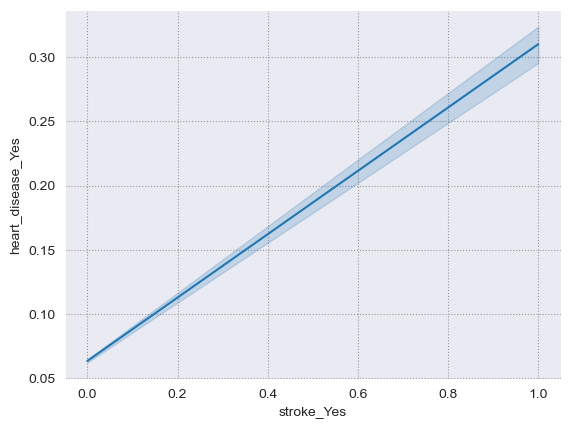

In [34]:
sns.lineplot(data=train, x='stroke_Yes', y='heart_disease_Yes')

Again, unsurprisingly, there is a correlation between someone having heart disease and someone having a stroke

## q3 - physical and mental health

In [35]:
ex.chi2_report(train, 'physical_health', 'mental_health')

Observed Values

[[97587  3425  6357  4038  1950  5317   474  1963]
 [ 2970   653   526   354   179   364    48   159]
 [ 4238   485   785   394   306   610    70   267]
 [ 2411   250   346   343   125   337    53   171]
 [ 1204    85   204   104   142   112    49    83]
 [ 2061   140   290   191    61   395    34    97]
 [  316    16    54    42    18    30    34    16]
 [ 1385    71   149   133    73    96    12   180]]
---
Expected Values

[[93413  4267  7254  4662  2376  6046   644  2445]
 [ 4051   185   314   202   103   262    27   106]
 [ 5518   252   428   275   140   357    38   144]
 [ 3112   142   241   155    79   201    21    81]
 [ 1529    69   118    76    38    99    10    40]
 [ 2521   115   195   125    64   163    17    65]
 [  405    18    31    20    10    26     2    10]
 [ 1618    73   125    80    41   104    11    42]]
---

chi^2 = 6947.5387
p     = 0.0000
Is p-value < alpha? True


In [36]:
train.head()

,bmi,physical_health,mental_health,sleep_time,smoker_Yes,heavy_drinker_Yes,stroke_Yes,difficulty_walking_Yes,sex_Male,age_group_25-29,age_group_30-34,age_group_35-39,age_group_40-44,age_group_45-49,age_group_50-54,age_group_55-59,age_group_60-64,age_group_65-69,age_group_70-74,age_group_75-79,age_group_80 or older,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_Yes,physically_active_Yes,general_health_Fair,general_health_Good,general_health_Poor,general_health_Very good,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes,heart_disease_Yes
53335,26.63,0.0,0.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
146989,32.08,0.0,0.0,6.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9040,24.68,0.0,0.0,6.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
41537,25.84,0.0,1.0,8.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
214389,25.06,0.0,0.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='physical_health', ylabel='mental_health'>

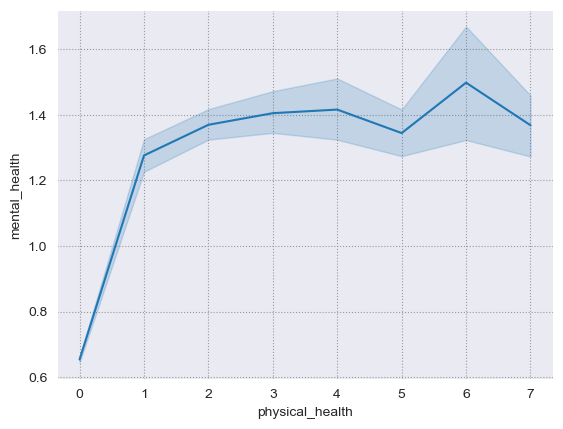

In [37]:
sns.lineplot(data=train, x='physical_health', y='mental_health')

Based upon the statistical test run (a chi^2 test), there is a relationship between the two features

Moving into modeling, I will try clustering these two together

## q4 diabetic and bmi

In [38]:
ex.ind_ttest_report(train['bmi'], train['diabetic_Yes'])

T-statistic = 1865.6207
p-value     = 0.0000
Is p-value < alpha? True


<AxesSubplot:xlabel='diabetic_Yes', ylabel='bmi'>

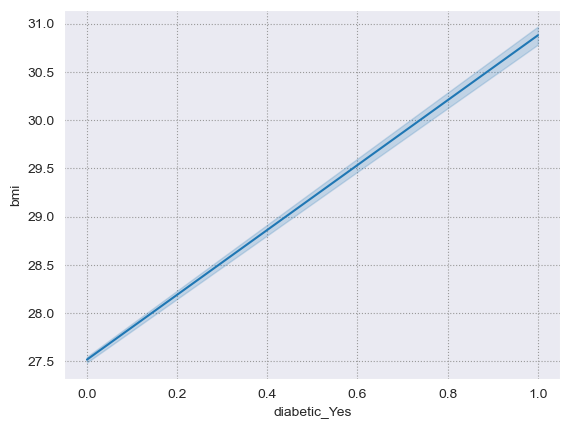

In [39]:
sns.lineplot(data=train, x='diabetic_Yes', y='bmi')

Since bmi, diatebes, and physical activity are all related to each other, I will try to cluster them together

I will also try to cluster the various age groups together

# model part 1-clustering

- ages

- bmi, diabetes, and physical activity

- physical and mental health